Saving diabetes.csv to diabetes (4).csv
Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Logistic Regression Accuracy: 0.75


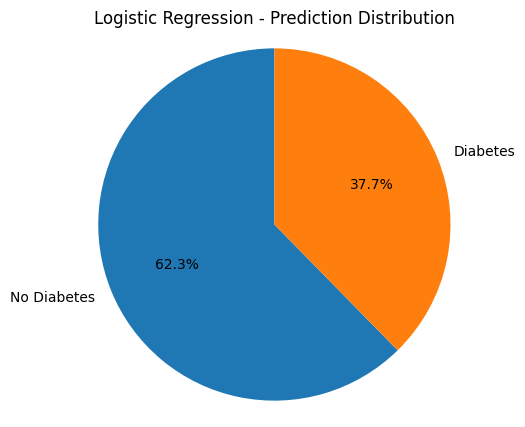

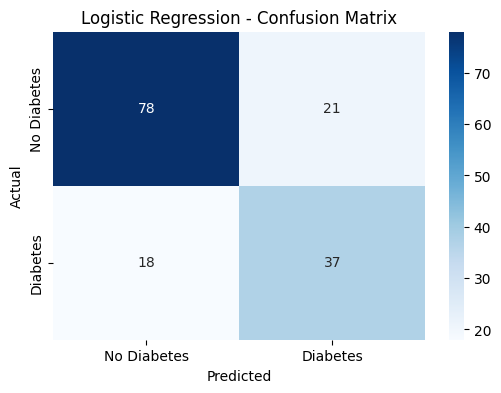

Decision Tree Accuracy: 0.75


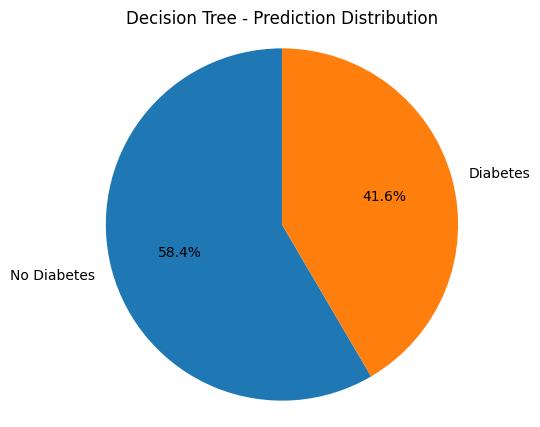

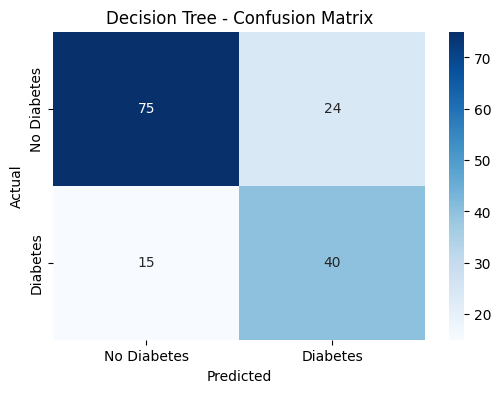

Random Forest Accuracy: 0.71


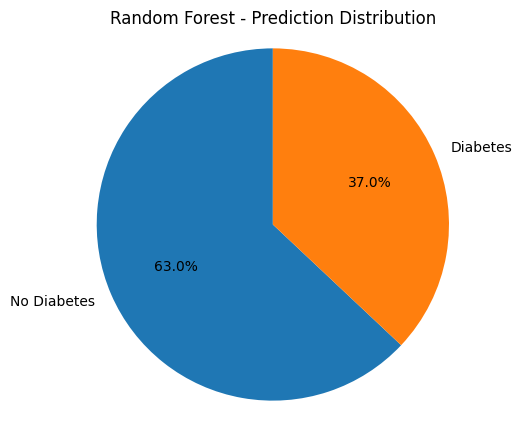

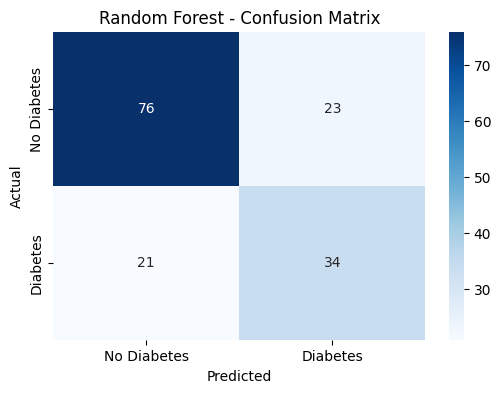

In [10]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import files
import io
#Upload CSV file
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
#Display dataset info
print("Dataset shape:", df.shape)
print(df.head())
#Features and target
X = df.drop('Outcome', axis=1)  # Ensure 'Outcome' is your target column
y = df['Outcome']
label_names = ['No Diabetes', 'Diabetes']
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Evaluation function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")
 #Pie chart of predictions
    unique, counts = np.unique(y_pred, return_counts=True)
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=[label_names[i] for i in unique], autopct='%1.1f%%', startangle=90)
    plt.title(f'{name} - Prediction Distribution')
    plt.axis('equal')
    plt.show()
#Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
#Run models
evaluate_model(LogisticRegression(max_iter=200), "Logistic Regression")
evaluate_model(DecisionTreeClassifier(), "Decision Tree")
evaluate_model(RandomForestClassifier(), "Random Forest")
